In [ ]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

d_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 49)                134750    
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         135485    
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [ ]:
d_autoencoder.fit(x_train, x_train,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 20ms/step - loss: 0.2299 - val_loss: 0.1477
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1339 - val_loss: 0.1217
Epoch 3/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1178 - val_loss: 0.1111
Epoch 4/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1090 - val_loss: 0.1044
Epoch 5/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1035 - val_loss: 0.1000
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0996 - val_loss: 0.0969
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0963 - val_loss: 0.0936
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.0936 - val_loss: 0.0913
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.0915 - val_loss: 0.0900
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.089

In [ ]:
len(x_test)

10000

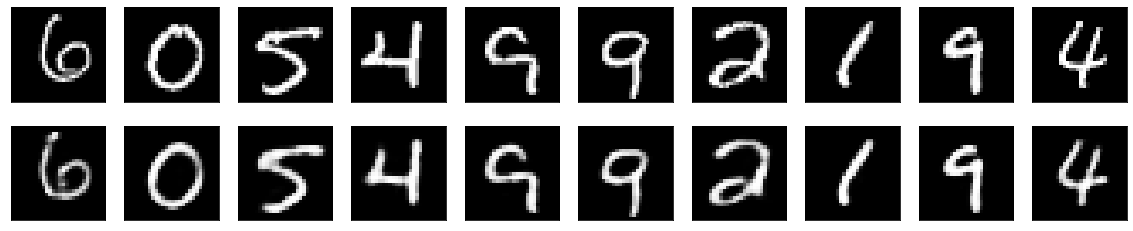

In [ ]:
n = 10

imgs = x_test[100:100+n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

In [ ]:
!git clone https://git@github.com:erofale/encoderProject.git